In [135]:
# 필수 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import StandardScaler

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
# save_path = '/content/drive/MyDrive/Colab Notebooks/EDA_데이터/'

In [138]:
# df_all.to_csv(save_path + 'df_all.csv', index=False, encoding='utf-8-sig')

# df_all.to_parquet(save_path + 'df_all.parquet', index=False)

In [139]:
# cp -r /content/drive/MyDrive/Colab\ Notebooks/final_project/data /content

In [140]:
# 파일 현재 위치
!pwd

/content


In [141]:
cp -r /content/drive/MyDrive/Colab\ Notebooks/final_project/data /content

In [142]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [143]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [144]:
# pyarrow 설치 (parquet 파일 읽기용)
!pip install pyarrow

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

In [145]:
import os

# 현재 디렉토리의 모든 파일 확인
print(os.listdir())

['.config', 'sample_data', 'drive', 'data']


In [146]:
import pyarrow.parquet as pq

# 의심되는 파일이 실제 parquet인지 확인
pq.ParquetFile('data/train/2.신용정보/201807_train_신용정보.parquet')

In [147]:
path = 'data/train/2.신용정보/'


In [148]:
# 데이터 로드: 6개월 신용정보 parquet 파일 병합
file_list = [
    '201807_train_신용정보.parquet',
    '201808_train_신용정보.parquet',
    '201809_train_신용정보.parquet',
    '201810_train_신용정보.parquet',
    '201811_train_신용정보.parquet',
    '201812_train_신용정보.parquet'
]

df_all = pd.concat([pd.read_parquet(path + f) for f in file_list], ignore_index=True)
print("병합 완료: ", df_all.shape)

병합 완료:  (2400000, 42)


In [149]:
# 불필요한 컬럼 제거
cols_to_drop = ['자발한도감액후경과월', '강제한도감액후경과월', '한도증액후경과월', '카드론동의여부', '한도심사요청후경과월', '한도심사거절후경과월']
df_all.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print("컬럼 제거 완료")

컬럼 제거 완료


In [150]:
# 데이터 개요 확인
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 36 columns):
 #   Column          Dtype  
---  ------          -----  
 0   기준년월            int64  
 1   ID              object 
 2   최초한도금액          int64  
 3   카드이용한도금액        int64  
 4   CA한도금액          int64  
 5   일시상환론한도금액       int64  
 6   월상환론한도금액        int64  
 7   CA이자율_할인전       float64
 8   CL이자율_할인전       float64
 9   RV일시불이자율_할인전    float64
 10  RV현금서비스이자율_할인전  float64
 11  RV신청일자          float64
 12  RV약정청구율         float64
 13  RV최소결제비율        float64
 14  자발한도감액횟수_R12M   object 
 15  자발한도감액금액_R12M   int64  
 16  강제한도감액횟수_R12M   int64  
 17  강제한도감액금액_R12M   int64  
 18  한도증액횟수_R12M     object 
 19  한도증액금액_R12M     int64  
 20  상향가능한도금액        int64  
 21  상향가능CA한도금액      int64  
 22  월상환론상향가능한도금액    int64  
 23  RV전환가능여부        object 
 24  일시불ONLY전환가능여부   int64  
 25  카드이용한도금액_B1M    int64  
 26  카드이용한도금액_B2M    int64  
 27  특별한도보유여부_R3M    int64  
 28  연체감액여부_R3M  

In [151]:
# 결측치 수
missing_count = df_all.isnull().sum()
missing_count

,0
기준년월,0
ID,0
최초한도금액,0
카드이용한도금액,0
CA한도금액,0
일시상환론한도금액,0
월상환론한도금액,0
CA이자율_할인전,0
CL이자율_할인전,0
RV일시불이자율_할인전,0


In [152]:
# 결측치 있는 컬럼만 보기(RV신청일자, RV전환가능여부)
missing_df = pd.DataFrame({
    '결측치 수': missing_count,
    '결측치 비율(%)': missing_ratio
}).query('`결측치 수` > 0').sort_values(by='결측치 수', ascending=False)

missing_df

,결측치 수,결측치 비율(%)
RV신청일자,1951236,81.301500
RV전환가능여부,29473,1.228042


<Axes: >

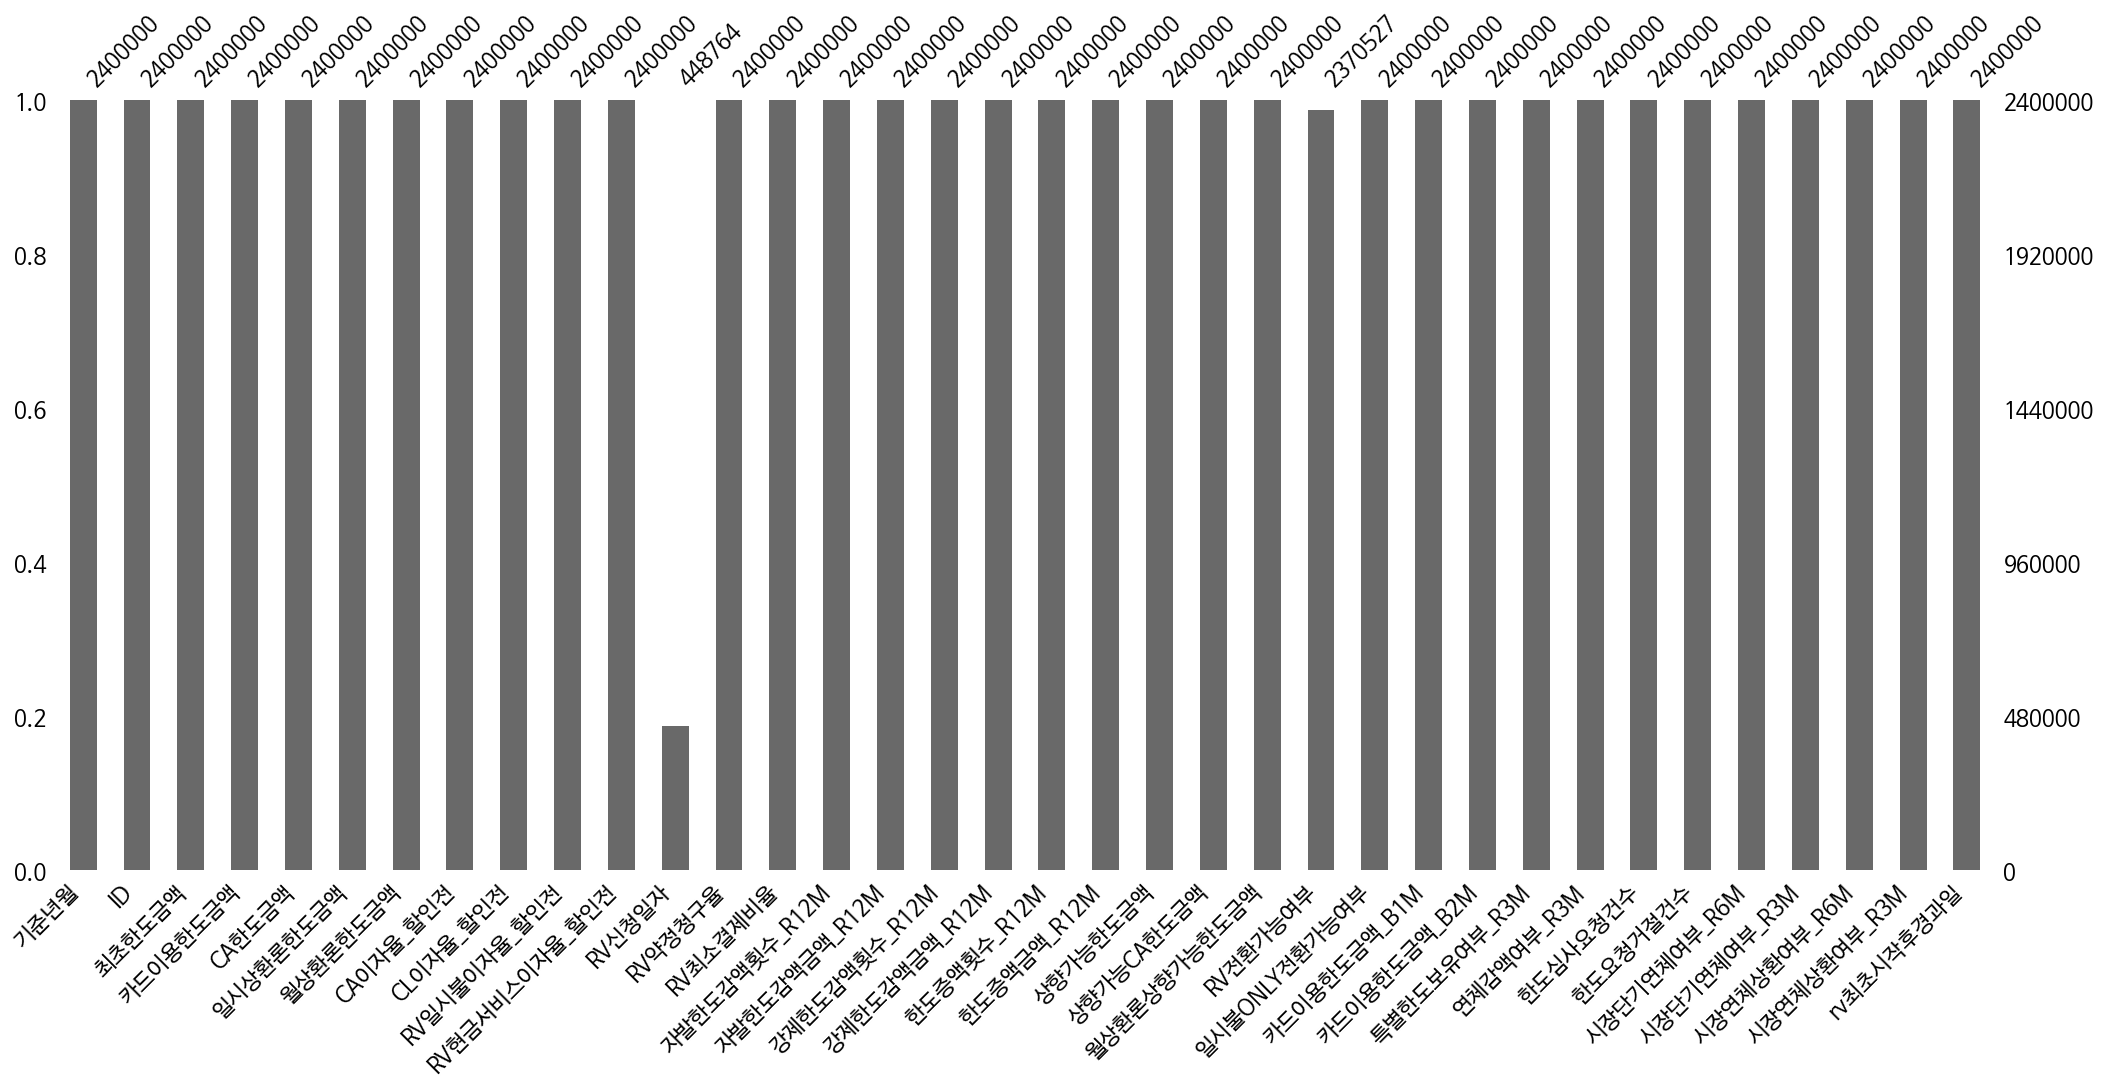

In [153]:
import missingno as msno
msno.bar(df_all)

In [154]:
# 결측치 비율 너무 높아서(81%) RV신청일자 컬럼 삭제
cols_to_drop = ['RV신청일자']
df_all.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print("컬럼 제거 완료")

컬럼 제거 완료


In [155]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 35 columns):
 #   Column          Dtype  
---  ------          -----  
 0   기준년월            int64  
 1   ID              object 
 2   최초한도금액          int64  
 3   카드이용한도금액        int64  
 4   CA한도금액          int64  
 5   일시상환론한도금액       int64  
 6   월상환론한도금액        int64  
 7   CA이자율_할인전       float64
 8   CL이자율_할인전       float64
 9   RV일시불이자율_할인전    float64
 10  RV현금서비스이자율_할인전  float64
 11  RV약정청구율         float64
 12  RV최소결제비율        float64
 13  자발한도감액횟수_R12M   object 
 14  자발한도감액금액_R12M   int64  
 15  강제한도감액횟수_R12M   int64  
 16  강제한도감액금액_R12M   int64  
 17  한도증액횟수_R12M     object 
 18  한도증액금액_R12M     int64  
 19  상향가능한도금액        int64  
 20  상향가능CA한도금액      int64  
 21  월상환론상향가능한도금액    int64  
 22  RV전환가능여부        object 
 23  일시불ONLY전환가능여부   int64  
 24  카드이용한도금액_B1M    int64  
 25  카드이용한도금액_B2M    int64  
 26  특별한도보유여부_R3M    int64  
 27  연체감액여부_R3M      int64  
 28  한도심사요청건수    

In [156]:
# Segment 컬럼 가져오기
# parquet 파일 열기
df01 = pd.read_parquet("/content/data/train/1.회원정보/201807_train_회원정보.parquet")

In [157]:
df_all = df_all.merge(df01[['ID', 'Segment']], on='ID', how='left')
df_all

,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,특별한도보유여부_R3M,연체감액여부_R3M,한도심사요청건수,한도요청거절건수,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일,Segment
0,201807,TRAIN_000000,0,19354,7270,0,0,22.995207,18.254978,17.264967,...,0,0,0회,0,0,0,0,0,99999999,D
1,201807,TRAIN_000001,0,9996,5718,41996,90611,14.793821,14.834873,10.622446,...,0,0,0회,0,0,0,0,0,322,E
2,201807,TRAIN_000002,0,88193,35207,0,0,22.014276,17.875321,17.155829,...,0,0,0회,0,0,0,0,0,2378,C
3,201807,TRAIN_000003,0,19062,6531,0,0,22.998014,22.999453,19.293674,...,0,0,0회,0,0,0,0,0,99999999,D
4,201807,TRAIN_000004,0,177222,47149,48000,155020,14.661948,10.897410,10.654587,...,0,0,0회,0,0,0,0,0,99999999,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,20070,10167,0,54445,15.243670,11.900516,10.545876,...,0,0,0회,0,0,0,0,0,99999999,E
2399996,201812,TRAIN_399996,0,84217,31159,0,156800,14.843464,15.652063,11.102726,...,0,0,0회,0,0,0,0,0,99999999,D
2399997,201812,TRAIN_399997,0,52612,19429,0,0,17.038599,17.966213,13.278475,...,0,0,0회,0,0,0,0,0,99999999,C
2399998,201812,TRAIN_399998,0,10002,4228,90004,180906,15.182880,11.901089,10.594124,...,0,0,0회,0,0,0,0,0,99999999,E


In [158]:
# RV신청일자 컬럼 삭제되었으니, RV약정청구율은 그대로 둔다
# RV전환가능여부 컬럼 결측치 -> N 값(0)으로 처리
df_all['RV전환가능여부'].value_counts(dropna=False)

,count
RV전환가능여부,
Z,1964098
N,406429
None,29473


In [159]:
# 전환 가능 여부 인코딩 및 결측치 처리
df_all['RV전환가능여부'] = df_all['RV전환가능여부'].map({'Z': 1, 'N': 0})
df_all['RV전환가능여부'] = df_all['RV전환가능여부'].fillna(0).astype(int)

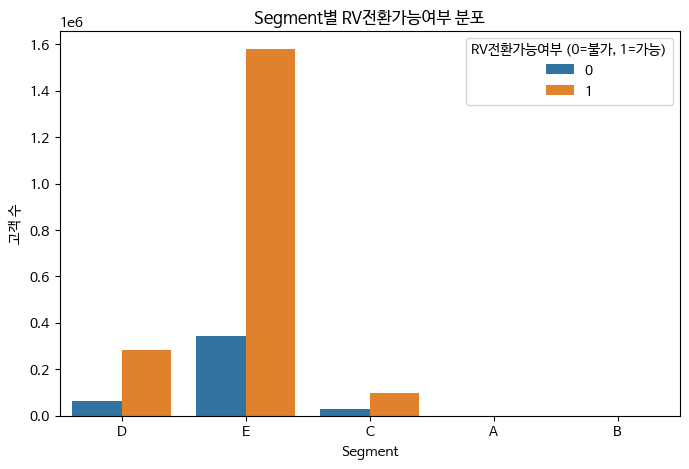

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df_all, x='Segment', hue='RV전환가능여부')
plt.title("Segment별 RV전환가능여부 분포")
plt.xlabel("Segment")
plt.ylabel("고객 수")
plt.legend(title="RV전환가능여부 (0=불가, 1=가능)")
plt.show()

In [161]:
# 결측치 재확인
missing_cols = df_all.columns[df_all.isnull().any()]
missing_cols

Index([], dtype='object')

In [ ]:
# # 고유값 확인
# df_all['ㅋ'].unique()

In [ ]:
# df_all['Segment'].value_counts()

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df_all['Segment'] = le.fit_transform(df_all['Segment'])  # A~E → 0~4

In [ ]:
# # 수치형 변수만 선택 (Segment 포함)
# numeric_cols = df_all.select_dtypes(include=[np.number]).columns

# # Segment와의 상관계수 계산
# corr_with_segment = df_all[numeric_cols].corr()['Segment'].drop('Segment')

In [ ]:
# # 절대값 기준으로 정렬해서 보기 (가장 상관 약한 것부터)
# corr_sorted = corr_with_segment.abs().sort_values()
# print(corr_sorted.head(10))

In [ ]:
# from sklearn.model_selection import train_test_split

# # Segment가 예측 대상
# X = df_all.drop(columns=['Segment'])  # 또는 'Segment_code' 등
# y = df_all['Segment']

# # 학습용/검증용 데이터 분리
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# 세그먼트별 평균값 (수치형만 보기 좋게 요약)
cluster_summary = df_all.groupby('Segment').mean(numeric_only=True).round(2)
cluster_summary.T  # 전치로 보기 편하게


In [ ]:
# 변수 간 상관관계 확인

# 수치형 변수만 선택
num_df = df_all.select_dtypes(include='number')

# 상관계수 히트맵
plt.figure(figsize=(14, 10))
sns.heatmap(num_df.corr(), annot=False, cmap='coolwarm')
plt.title("수치형 변수 간 상관관계 Heatmap")
plt.show()

In [ ]:
# 데이터 개요 확인
df_all.info()

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# 범주형 변수 목록 추출 (ID, segment 제외)
cat_cols = df_all.select_dtypes(include='object').columns.drop(['ID', 'Segment'], errors='ignore')

# 카이제곱 결과 저장 리스트
chi2_results = []

# 각 범주형 변수에 대해 segment와의 카이제곱 검정 수행
for col in cat_cols:
    contingency_table = pd.crosstab(df_all[col], df_all['Segment'])  # 교차표
    try:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results.append({
            '변수명': col,
            '카이제곱값': chi2,
            'p-value': p,
            '자유도': dof
        })
    except:
        pass  # 희소한 범주로 오류 발생 시 건너뜀

# 결과를 데이터프레임으로 정리
chi2_df = pd.DataFrame(chi2_results).sort_values(by='p-value')

# 상위 항목 확인
chi2_df.head(10)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼만 추출 (ID, segment 제외)
features = df_all.select_dtypes(include='number').drop(columns=['ID'], errors='ignore')

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# PCA 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과를 데이터프레임으로 저장
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Segment'] = df_all['Segment'].values

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Segment', palette='Set2', alpha=0.7)
plt.title("PCA 기반 Segment 분포 (2차원 축소)")
plt.xlabel("주성분 1 (PC1)")
plt.ylabel("주성분 2 (PC2)")
plt.legend(title='Segment')
plt.grid(True)
plt.show()


In [ ]:
# # 데이터 샘플 추출
# # 1. (선택) 데이터 샘플링: df_all에서 500개 샘플 추출
# df_all_sample = df_all.sample(n=500, random_state=42)  # 또는 head(n)

# # 2. CSV 파일로 저장 (인코딩은 Excel 호환 위해 cp949 사용)
# df_all_sample.to_csv('df_all_sample.csv', index=False, encoding='cp949')

# # 3. 로컬로 다운로드
# from google.colab import files
# files.download('df_all_sample.csv')

In [ ]:
# # 1. 컬럼명 확인
# print(df_all_sample.columns.tolist())

# # 2. 데이터 미리보기
# print(df_all_sample.head(3))

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# def calculate_vif(X):
#     X = add_constant(X)  # 상수항 추가 (intercept)
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = X.columns
#     vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     return vif_data

In [ ]:
# # 수치형 데이터만 다중공선성(VIF)계산
# numeric_cols = df_all.select_dtypes(include='number')
# vif_result = calculate_vif(numeric_cols)
# print(vif_result)

In [ ]:
# # parquet 파일 열기
# df1 = pd.read_parquet("201807_train_청구정보.parquet")

# # csv로 저장
# df1.to_csv("201807_train_청구정보.csv", index=False)


In [ ]:
# # parquet 파일 열고 csv로 저장
# df2 = pd.read_parquet("201807_train_청구정보.parquet")
# df2.to_csv("201807_train_청구정보.csv", index=False)

# df3 = pd.read_parquet("201807_train_청구정보.parquet")
# df3.to_csv("201807_train_청구정보.csv", index=False)

# df4 = pd.read_parquet("201807_train_청구정보.parquet")
# df4.to_csv("201807_train_청구정보.csv", index=False)

# df5 = pd.read_parquet("201807_train_청구정보.parquet")
# df5.to_csv("201807_train_청구정보.csv", index=False)

# df6 = pd.read_parquet("201807_train_청구정보.parquet")
# df6.to_csv("201807_train_청구정보.csv", index=False)

In [162]:
df_all

,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,특별한도보유여부_R3M,연체감액여부_R3M,한도심사요청건수,한도요청거절건수,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일,Segment
0,201807,TRAIN_000000,0,19354,7270,0,0,22.995207,18.254978,17.264967,...,0,0,0회,0,0,0,0,0,99999999,D
1,201807,TRAIN_000001,0,9996,5718,41996,90611,14.793821,14.834873,10.622446,...,0,0,0회,0,0,0,0,0,322,E
2,201807,TRAIN_000002,0,88193,35207,0,0,22.014276,17.875321,17.155829,...,0,0,0회,0,0,0,0,0,2378,C
3,201807,TRAIN_000003,0,19062,6531,0,0,22.998014,22.999453,19.293674,...,0,0,0회,0,0,0,0,0,99999999,D
4,201807,TRAIN_000004,0,177222,47149,48000,155020,14.661948,10.897410,10.654587,...,0,0,0회,0,0,0,0,0,99999999,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,20070,10167,0,54445,15.243670,11.900516,10.545876,...,0,0,0회,0,0,0,0,0,99999999,E
2399996,201812,TRAIN_399996,0,84217,31159,0,156800,14.843464,15.652063,11.102726,...,0,0,0회,0,0,0,0,0,99999999,D
2399997,201812,TRAIN_399997,0,52612,19429,0,0,17.038599,17.966213,13.278475,...,0,0,0회,0,0,0,0,0,99999999,C
2399998,201812,TRAIN_399998,0,10002,4228,90004,180906,15.182880,11.901089,10.594124,...,0,0,0회,0,0,0,0,0,99999999,E


In [ ]:
# # CSV 파일 불러오기
# df = pd.read_csv('df_all.csv', encoding='cp949') # 경로는 필요 시 수정

# # Parquet 파일로 저장
# df.to_parquet('df_all.parquet', index=False)

In [164]:
# Parquet로 저장
df_all.to_parquet("train_2번eda.parquet", index=False)

# 파일 다운로드
from google.colab import files
files.download("train_2번eda.parquet")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>